# Import Library

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score

# Data Extraction

In [10]:
df=pd.read_csv('Churn_Modelling.csv')

# EDA

## Checking Missing Value and Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### 1) There is no missing value
#### 2) Numerical Data: Age, Estimated Salary, Tenure, Balance, CreditScore, 
#### 3a) Categorical Data: Gender, Geography
#### 3b) HasCrDard, IsActiveMember and NumofProducts should be Categorical/ Binary Data rather than int64
#### 4) Label: Exited should be Categorical data

## Prepare Dataset for EDA

In [11]:
EDA_Data=df
EDA_Data['Exited']=EDA_Data['Exited'].apply(lambda x: 'Exit' if x==1 else 'Not Exit')
EDA_Data['HasCrCard']=EDA_Data['HasCrCard'].apply(lambda x: 'Has Credit Card' if x==1 else 'Do not have Credit Card')
EDA_Data['IsActiveMember']=EDA_Data['IsActiveMember'].apply(lambda x: 'Active Member' if x==1 else 'Inactive Member')
EDA_Data['NumOfProducts']=EDA_Data['NumOfProducts'].astype('str')

In [12]:
EDA_Data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000


## Part 1: Relationship between Numerical Data and Exited

### 1) Relationship between Age and Exited

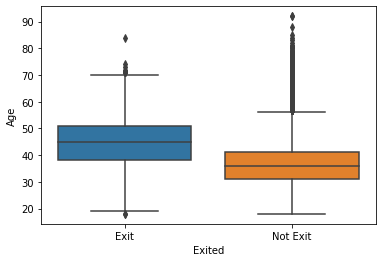

In [31]:
sns.boxplot(x='Exited',y='Age',data=EDA_Data)

#### Overall, customer who exited is older than those not exit. 
#### The median of exited customer is around 45 years old.
#### The median of exited customer is already older than 75% not exit customer.

### 2) Relationship between Tenure and Exited

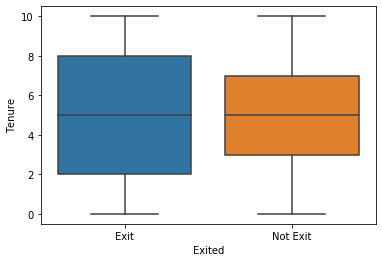

In [22]:
sns.boxplot(x='Exited',y='Tenure',data=EDA_Data)

#### Compare to Not Exist Customer, Customer who join less than 3 years or above 7 years are more likely to exit.

### 3) Relationship between Balance and Exited

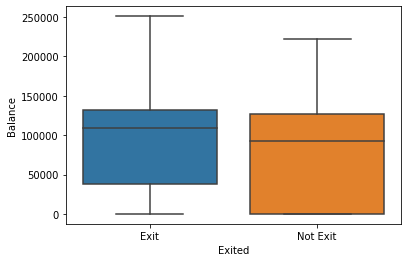

In [24]:
sns.boxplot(x='Exited',y='Balance',data=EDA_Data)

#### Customer whose balance less than $40000 are more likely not exit
#### The top 25% exit customer has higher balance than those not exit

### 4) Relationship between Credit Score and Exited

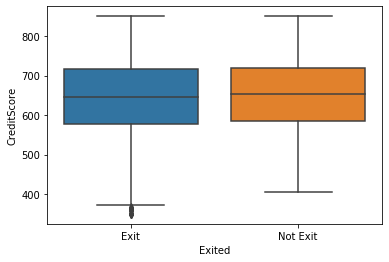

In [47]:
sns.boxplot(x='Exited',y='CreditScore',data=EDA_Data)

#### Credit Score only slightly correlated to Exited. 
#### Customer with lower credt score slightly exit.
#### There are some outliers whose score fall around 350. 

### 5) Relationship between EstimatedSalary and Exited

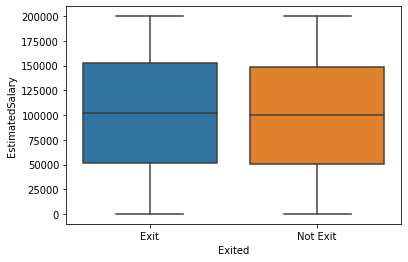

In [242]:
sns.boxplot(x='Exited',y='EstimatedSalary',data=EDA_Data)

#### Estimated Salary do not correlated to Exited.

### 6) Correlation between numerical features

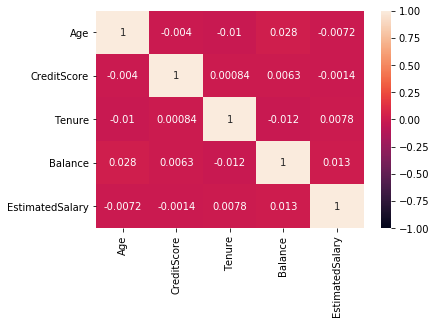

In [14]:
EDA_num=EDA_Data[['Age','CreditScore','Tenure', 'Balance','EstimatedSalary']]
sns.heatmap(EDA_num.corr(),vmin=-1,vmax=1,annot=True)

#### Features with color close to 0 means no correlation, 
#### Features with color close to -1 or 1 means having strong negative or postive relationship to each other respectively. 
#### From the above heat map, we can see that all features only have weak relationship to each other.

## Part 2: Relationship between Categorical Data and Exited

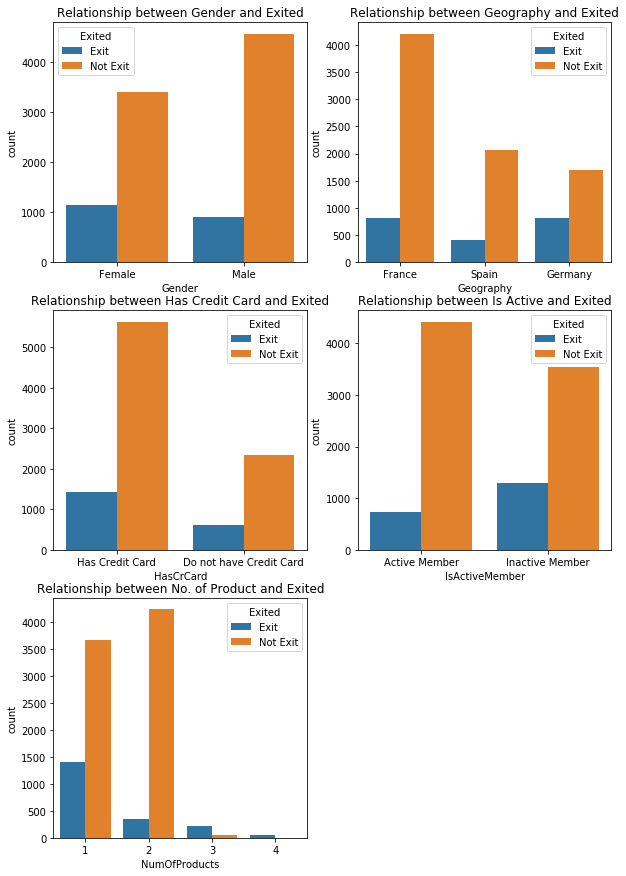

In [25]:
fig, axis = plt.subplots(3, 2, figsize=(10,15),)
axis[0,0].set_title("Relationship between Gender and Exited")
axis[0,1].set_title("Relationship between Geography and Exited")
axis[1,0].set_title("Relationship between Has Credit Card and Exited")
axis[1,1].set_title("Relationship between Is Active and Exited")
axis[2,0].set_title("Relationship between No. of Product and Exited")

sns.countplot(x='Gender',hue='Exited',data=EDA_Data,ax=axis[0,0])
sns.countplot(x='Geography',hue='Exited',data=EDA_Data,ax=axis[0,1])
sns.countplot(x='HasCrCard',hue='Exited',data=EDA_Data,ax=axis[1,0])
sns.countplot(x='IsActiveMember',hue='Exited',data=EDA_Data,ax=axis[1,1])
sns.countplot(x='NumOfProducts',hue='Exited',data=EDA_Data,ax=axis[2,0])

axis[2,1].remove()

#### From the above diagram, we can see that:
#### 1) Female is easier exit than Male
#### 2) Customer in Germany more likely to exit
#### 3) Inactive Member has higher proportion to exit than Active Member
#### 4) Credit Card is not correlated to Exit
#### 5) Customer with 2 products have higher proportion not exit

## Train Data without Feature Engineering - Set 1

In [291]:
X0=df.iloc[:,3:-1]
X0_c=X0.loc[:,['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']]

#### Apply OneHotEncoding to Categorical Data: (Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember)

In [292]:
X0_c=pd.get_dummies(X0_c)

In [293]:
from sklearn.preprocessing import StandardScaler
X0_n=X0.loc[:,['CreditScore','Age','Balance','Tenure','EstimatedSalary']]
scaler = StandardScaler()
X0_n1=scaler.fit_transform(X0_n)

In [294]:
X0_n1=pd.DataFrame(X0_n1,columns=['CreditScore','Age','Balance','Tenure','EstimatedSalary'])

In [295]:
X=pd.concat([X0_c,X0_n1],axis=1)
y=EDA_Data['Exited'].apply(lambda x: 1 if x=='Exit' else 0)

In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [297]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred=clf.predict(X_test)
clf.score(X_test, y_test)

0.843

In [298]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
svc=clf.fit(X_train, y_train)
y_pred=svc.predict(X_test)
svc.score(X_test, y_test)

0.8555

In [299]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
clf.score(X_test, y_test)

0.8655

In [300]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest = xgb.DMatrix(data = X_test, label = y_test) 
# specify parameters via map
param = {'max_depth':4, 'eta':1, 'objective':'binary:hinge' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
accuracy_score(y_test,preds)

0.8645

## Train Data with Feature Engineering (Based on EDA) - Set 2 
### [Keep all hyperparameter same as Set 1]

### Remove Estimated Salary, Has Credit Card and Credit Score refer to EDA

In [301]:
X1=df.iloc[:,3:-1]
X1_c=X1.loc[:,['Geography','Gender','NumOfProducts','IsActiveMember']]
X1_n=X1.loc[:,['Age','Balance','Tenure']]

### Part 1: Distribution of Numerical Feature

In [302]:
EDA_Data[EDA_Data['Exited']=='Exit'].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,2037.000000,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,101465.677531
std,2866.855245,7.269262e+04,100.321503,9.761562,2.936106,58360.794816,57912.418071
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,11.580000
25%,2419.000000,1.562736e+07,578.000000,38.000000,2.000000,38340.020000,51907.720000
50%,4871.000000,1.568896e+07,646.000000,45.000000,5.000000,109349.290000,102460.840000
75%,7404.000000,1.575309e+07,716.000000,51.000000,8.000000,131433.330000,152422.910000
max,9999.000000,1.581566e+07,850.000000,84.000000,10.000000,250898.090000,199808.100000


In [303]:
EDA_Data[EDA_Data['Exited']=='Not Exit'].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,7963.000000,7.963000e+03,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000
mean,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,99738.391772
std,2891.682053,7.174423e+04,95.653837,10.125363,2.880658,62848.040701,57405.586966
min,2.000000,1.556570e+07,405.000000,18.000000,0.000000,0.000000,90.070000
25%,2526.500000,1.562882e+07,585.000000,31.000000,3.000000,0.000000,50783.490000
50%,5042.000000,1.569154e+07,653.000000,36.000000,5.000000,92072.680000,99645.040000
75%,7525.500000,1.575335e+07,718.000000,41.000000,7.000000,126410.280000,148609.955000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,221532.800000,199992.480000


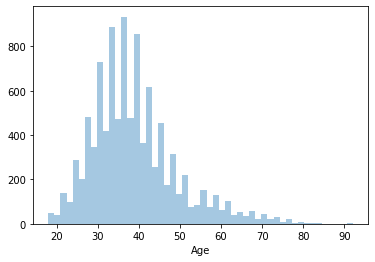

In [304]:
sns.distplot(a=EDA_Data['Age'],kde=False)

In [305]:
def age_gp(a):
    if a>=18 and a<30:
        return 'Gp1'
    elif a>=30 and a<40:
        return 'Gp2'
    elif a>=40 and a<50:
        return 'Gp3'
    elif a>=50:
        return 'Gp4'

In [306]:
X1_c['Age_group']=X1_n['Age'].apply(age_gp)

In [307]:
X1_c.head(3)

,Geography,Gender,NumOfProducts,IsActiveMember,Age_group
0,France,Female,1,Active Member,Gp3
1,Spain,Female,1,Active Member,Gp3
2,France,Female,3,Inactive Member,Gp3


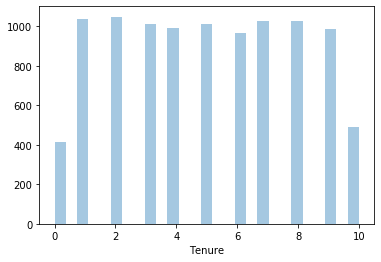

In [308]:
sns.distplot(a=EDA_Data['Tenure'],kde=False)

In [309]:
X1_c['Tenure_group']=X1_n['Tenure'].astype('str')

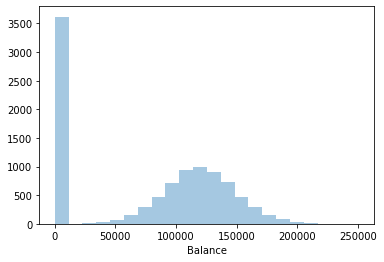

In [310]:
sns.distplot(a=EDA_Data['Balance'],kde=False)

In [311]:
X1_c['Balance_Group']=X1_n['Balance'].apply(lambda x: 'Without Balance' if x==0 else 'With Balance')

In [312]:
## As All of X's are Catergorical Data, only need transfer them to Binary Dataa

In [313]:
X1_c2=pd.get_dummies(X1_c)
y=EDA_Data['Exited'].apply(lambda x: 1 if x=='Exit' else 0)

In [314]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1_c2, y, test_size=0.2, random_state=42)

In [315]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred=clf.predict(X_test)
clf.score(X_test, y_test)

0.8585

In [317]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
svc=clf.fit(X_train, y_train)
y_pred=svc.predict(X_test)
svc.score(X_test, y_test)

0.846

In [318]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
clf.score(X_test, y_test)

0.8605

In [319]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest = xgb.DMatrix(data = X_test, label = y_test) 
# specify parameters via map
param = {'max_depth':4, 'eta':1, 'objective':'binary:hinge' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
accuracy_score(y_test,preds)

0.8515

#### We can see that the best model among Set 1 and Set 2 is 'Random Forest in Set 1'
#### SVM, Random Forest and XGBoosting perform better in Set 1; while Logistic Regression perform better in Set 2
#### Next time, I will fine tune the hyperparameter to see if I can get better result